# Data Science Notebook 

In [1]:
# !pip install -r requirements.txt

In [1]:
import os, sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import set_config
from loguru import logger

In [2]:
# Turn off jedi
%config IPCompleter.use_jedi=False

# Set sklearn output to pandas
set_config(transform_output = "pandas")

workdir = os.path.dirname(os.getcwd())

sys.path.append(workdir)

pd.options.display.max_columns = None

warnings.filterwarnings("ignore")

# display(
#     HTML(
#         """
#         <style>
#         .container { width:100% !important; }
#         </style>
#         """
#     )
# )

In [ ]:
df = pd.read_parquet("/home/eduardo/Git/dados-gov-br-cnpj-python/datasets/interim/parquet")

In [9]:
# import os
# from basix import files, parquet
# from src.data.load import get_links_by_types, download_file, extract_filename, extract_type, read_csv_within_zip
# from src.config import PATH_ZIP_DIRECTORY, PATH_PARQUET_DIRECTORY
# from src.data.load import add_date, get_current_timestamp

# update = False

# timestamp = get_current_timestamp()

# urls = get_links_by_types()

# database_type = 'Empresas'
    
# for url in urls[database_type]:
#     try:

#         filename = extract_filename(url)

#         logger.info(f'---------------------- {filename.replace(".zip", "")}')

#         zip_directory_path = os.path.join(PATH_ZIP_DIRECTORY, database_type)

#         zip_local_filepath = os.path.join(zip_directory_path, filename)

#         parquet_directory_path = os.path.join(PATH_PARQUET_DIRECTORY, database_type)

#         parquet_local_filepath = os.path.join(parquet_directory_path, filename.replace(".zip", ".parquet"))

#         files.make_directory(zip_directory_path)

#         if update:
#             logger.info(f"Downloading zip from {url} and persisting to {zip_local_filepath}")
#             download_file(url, zip_local_filepath)

#         logger.info(f"Reading csv within {zip_local_filepath}")
#         df = read_csv_within_zip(zip_local_filepath)

#         df = df.pipe(add_date, timestamp = timestamp)

#         logger.info(f"Persisting dataframe to parquet format in {parquet_local_filepath}")
#         parquet.write(df, parquet_local_filepath, overwrite=True)

#     except Exception as err:
#         logger.error(err)

2023-02-10 12:06:28.914 | INFO     | __main__:<module>:20 - ---------------------- Empresas0
2023-02-10 12:06:28.916 | INFO     | __main__:<module>:33 - Downloading zip from http://200.152.38.155/CNPJ/Empresas0.zip and persisting to datasets/raw/zip/Empresas/Empresas0.zip
2023-02-10 12:07:27.246 | INFO     | __main__:<module>:36 - Reading csv within datasets/raw/zip/Empresas/Empresas0.zip
2023-02-10 12:07:36.588 | INFO     | __main__:<module>:41 - Persisting dataframe to parquet format in datasets/raw/parquet/Empresas/Empresas0.parquet
2023-02-10 12:07:41.479 | INFO     | __main__:<module>:20 - ---------------------- Empresas1
2023-02-10 12:07:41.480 | INFO     | __main__:<module>:33 - Downloading zip from http://200.152.38.155/CNPJ/Empresas1.zip and persisting to datasets/raw/zip/Empresas/Empresas1.zip
2023-02-10 12:08:07.437 | INFO     | __main__:<module>:36 - Reading csv within datasets/raw/zip/Empresas/Empresas1.zip
2023-02-10 12:08:11.021 | INFO     | __main__:<module>:41 - Persis

In [4]:
import os
from basix import files, parquet
from src.data.load import get_links_by_types, download_file, extract_filename, extract_type, read_csv_within_zip
from src.config import PATH_ZIP_DIRECTORY, PATH_PARQUET_DIRECTORY
from src.data.load import add_date, get_current_timestamp

update = False

timestamp = get_current_timestamp()

urls = get_links_by_types()

database_type = 'Estabelecimentos'
    
for url in urls[database_type]:
    try:

        filename = extract_filename(url)

        logger.info(f'---------------------- {filename.replace(".zip", "")}')

        zip_directory_path = os.path.join(PATH_ZIP_DIRECTORY, database_type)

        zip_local_filepath = os.path.join(zip_directory_path, filename)

        parquet_directory_path = os.path.join(PATH_PARQUET_DIRECTORY, database_type)

        parquet_local_filepath = os.path.join(parquet_directory_path, filename.replace(".zip", ".parquet"))

        files.make_directory(zip_directory_path)

        if update:
            logger.info(f"Downloading zip from {url} and persisting to {zip_local_filepath}")
            download_file(url, zip_local_filepath)

        logger.info(f"Reading csv within {zip_local_filepath}")
        df = read_csv_within_zip(zip_local_filepath)

        df = df.pipe(add_date, timestamp = timestamp)

        logger.info(f"Persisting dataframe to parquet format in {parquet_local_filepath}")
        parquet.write(df, parquet_local_filepath, overwrite=True)

    except Exception as err:
        logger.error(err)

'/home/eduardo/Git/dados-gov-br-cnpj-python/datasets/raw/parquet/Empresas'

In [12]:
from itertools import product

est_path = "datasets/raw/parquet/Estabelecimentos/"
emp_path = "datasets/raw/parquet/Empresas/"

def export_merged(est_part_path, emp_part_path, label):
    
    df_est = pd.read_parquet(est_part_path)
    df_emp = pd.read_parquet(emp_part_path)
    
    merged = df_est.merge(df_emp, on="cnpj_base", how="inner", suffixes=("", "_duplicated"))
    local = f"datasets/interim/parquet/Merged/{label}.parquet"
    parquet.write(merged, local, overwrite=True)
    

var =[]
for i, files in enumerate(product(sorted(os.listdir(est_path)), sorted(os.listdir(emp_path)))):
    
    est, emp = files
    
    est_part_path = os.path.join(est_path, est)
    emp_part_path = os.path.join(emp_path, est)
    
    
    
    df_est = pd.read_parquet(est_part_path)
    df_emp = pd.read_parquet(emp_part_path)
    
    merged = df_est.merge(df_emp, on="cnpj_base", how="inner", suffixes=("", "_duplicated"))
    
    
    merged.to_parquet(

In [77]:
# df = pd.read_parquet("datasets/interim/parquet/SummaryInfo/part-000001.parquet/")
df.sample(20)

,cnpj,nome_fantasia,razao_social,cd_cnae_principal,porte_empresa,natureza_juridica,capital_social
47004,41837155000164,MARILIA CPD,MARILIA SANTOS DA CONCEICAO 40349778841,8712300,1,2135,"500,00"
69127,42075232000159,<NA>,BETINA VIEIRA LEMOS 07399418527,9602501,1,2135,"500,00"
57637,41485135000171,POUSADA E CHURRASCARIA ARARINHA AZUL,POUSADA E CHURRASCARIA ARARINHA AZUL LTDA,5590699,3,2062,"150000,00"
70882,42094620000187,FUSCAO ELETRICISTA,JOSE ROBERTO PEREIRA DA SILVA 56180586187,4321500,1,2135,"600,00"
27455,41603118000191,AKUSTIK MUSICA,ELISABETE MORAIS LOPES CUSTODIO 04820672924,4756300,1,2135,"100,00"
77028,42165038000164,<NA>,SIGMA ENGENHARIA E SERVICOS LTDA,7112000,1,2062,"15000,00"
76991,42164628000172,LICO PROMOTOR,VALMIR GOMES DA SILVA 01370874626,7319002,1,2135,"1,00"
48456,41854110000106,DESINFOXICACAO,FABRIZIO ALVES DARDES 46369361836,7319002,1,2135,"2000,00"
6744,41354889000192,ADEGA DA PRACA,RAUL FRANCO DA SILVA 43608528865,4723700,1,2135,"1000,00"
74086,42131389000154,RITMO.TI,RITMO TECNOLOGIA DA INFORMACAO LTDA,6204000,1,2062,"10000,00"


In [68]:
df

,cnpj,nome_fantasia,razao_social,cd_cnae_principal,porte_empresa,natureza_juridica,capital_social
0,43283811021904,<NA>,KALUNGA SA,4647801,5,2046,"56127257,77"
1,43283811016749,<NA>,KALUNGA SA,4761003,5,2046,"56127257,77"
2,43283811023796,<NA>,KALUNGA SA,4761003,5,2046,"56127257,77"
3,43283811023958,<NA>,KALUNGA SA,4761003,5,2046,"56127257,77"
4,43283811020690,<NA>,KALUNGA SA,4761003,5,2046,"56127257,77"
...,...,...,...,...,...,...,...
87950,43296568000104,<NA>,VIVIANE LEITE ROCHA 04466296693,8230001,1,2135,"1000,00"
87951,43296588000185,CELSO,CELSO PEREIRA DE LIMA 08725585843,5229099,1,2135,"1365,00"
87952,43296598000110,MAR & AREIA,BIANCA DUARTE ALBANI 14743425743,4781400,1,2135,"5000,00"
87953,43296621000177,<NA>,THALIA RODRIGUES LEITE MATOS 47436885820,4930201,1,2135,"1000,00"


<AxesSubplot: >

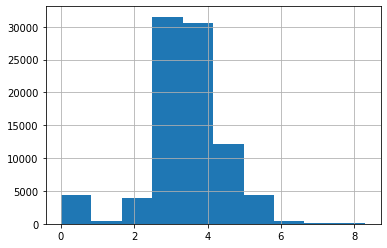

In [66]:
np.log10(df['capital_social'].str.replace(",",".").astype(float).clip(1,200000000)).hist()

In [37]:
df

,cnpj_base,cnpj_ordem,cnpj_dv,cd_matriz_filial,nome_fantasia,cd_situacao_cadastral,dt_situacao_cadastral,cd_motivo_situacao_cadastral,cidade_exterior,cd_pais,dt_inicio_atividade,cd_cnae_principal,cd_cnae_secundario,tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,cd_municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,email,situacao_especial,dt_situacao_especial,creation_date,razao_social,natureza_juridica,qualificacao,capital_social,porte_empresa,ente_federativo,creation_date_duplicated
0,43283811,219,4,2,None,2,20190225,0,None,NaN,20190225,4647801,"4635499,4639701,4651602,4721104,4723700,476100...",AVENIDA,VICTOR FERREIRA DO AMARAL,2633,LOJA L1074 ANDAR L01,TARUMA,82810350.0,PR,7535,11.0,33469798.0,NaN,<NA>,<NA>,<NA>,ESCRITAFISCAL@KALUNGA.COM.BR,None,NaN,20230305,KALUNGA SA,2046,10,"56127257,77",5.0,None,20230305
1,43283811,167,49,2,None,2,20161005,0,None,NaN,20161005,4761003,"1811302,1813001,1813099,1821100,1822901,464780...",AVENIDA,RIO VERDE S/N QUADRA 102 / 104,S/N,QUADRA102 LOTE A ...,VILA SAO TOMAZ,74915906.0,GO,9227,62.0,32615320.0,NaN,<NA>,<NA>,<NA>,None,None,NaN,20230305,KALUNGA SA,2046,10,"56127257,77",5.0,None,20230305
2,43283811,237,96,2,None,2,20200106,0,None,NaN,20200106,4761003,"1811302,1813001,1813099,1821100,1822901,461920...",RUA,DA MOOCA,766,ANDAR 2 ANDAR SALA 13,MOOCA,3104010.0,SP,7107,11.0,33469600.0,NaN,<NA>,<NA>,<NA>,PARALEGAL@KALUNGA.COM.BR,None,NaN,20230305,KALUNGA SA,2046,10,"56127257,77",5.0,None,20230305
3,43283811,239,58,2,None,2,20200731,0,None,NaN,20200731,4761003,"1811302,1813001,1813099,1821100,1822901,461920...",RUA,GERONCIO THIVES,1079,SUC S 23/24/25 SHOPPING ITAGUACU,BARREIROS,88117900.0,SC,8327,11.0,33469764.0,NaN,<NA>,<NA>,<NA>,ESCRITAFISCAL@KALUNGA.COM.BR,None,NaN,20230305,KALUNGA SA,2046,10,"56127257,77",5.0,None,20230305
4,43283811,206,90,2,None,2,20180801,0,None,NaN,20180801,4761003,"1811302,1813001,1813099,1821100,1822901,464780...",AVENIDA,PRESIDENTE KENNEDY,4121,LOJA 3096 ANDAR L3,PORTAO,80610905.0,PR,7535,11.0,33469798.0,NaN,<NA>,11.0,33469600.0,ESCRITAFISCAL@KALUNGA.COM.BR,None,NaN,20230305,KALUNGA SA,2046,10,"56127257,77",5.0,None,20230305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87950,43296568,1,4,1,None,2,20210826,0,None,NaN,20210826,8230001,None,RUA,NOGUEIRA DA GAMA,1001,None,ALTO DOS PINHEIROS,30530100.0,MG,4123,31.0,97576677.0,NaN,<NA>,<NA>,<NA>,VIVIANELR@YAHOO.COM.BR,None,NaN,20230305,VIVIANE LEITE ROCHA 04466296693,2135,50,"1000,00",1.0,None,20230305
87951,43296588,1,85,1,CELSO,2,20210826,0,None,NaN,20210826,5229099,None,RUA,FAUSTO DOMINGUES,312,None,JARDIM FONTALIS,2360020.0,SP,7107,11.0,29954120.0,NaN,<NA>,<NA>,<NA>,CELSOLIMA08@GMAIL.COM,None,NaN,20230305,CELSO PEREIRA DE LIMA 08725585843,2135,50,"1365,00",1.0,None,20230305
87952,43296598,1,10,1,MAR & AREIA,2,20210826,0,None,NaN,20210826,4781400,"8599699,8599605,8599604",AVENIDA,HENRIQUE MOSCOSO,717,SALA 307,CENTRO DE VILA VELHA,29100021.0,ES,5703,27.0,99280407.0,NaN,<NA>,<NA>,<NA>,RONALDO.ALBANI@GMAIL.COM,None,NaN,20230305,BIANCA DUARTE ALBANI 14743425743,2135,50,"5000,00",1.0,None,20230305
87953,43296621,1,77,1,None,2,20210826,0,None,NaN,20210826,4930201,None,ESTRADA,CLAUDIONOR BELARMINO FERREIRA,169,CASA RUA JOEL FORTUNATO,VILA MAZZEI,18209510.0,SP,6547,15.0,91051842.0,NaN,<NA>,<NA>,<NA>,CARLOSALTIERES67@GMAIL.COM,None,NaN,20230305,THALIA RODRIGUES LEITE MATOS 47436885820,2135,50,"1000,00",1.0,None,20230305


In [67]:
3200*5

16000

In [33]:
import sys
import subprocess

my_env = os.environ.copy()

my_env["PYTHONPATH"] = os.getcwd()
my_env["PATH"] = my_env["PATH"] + f":{os.getcwd()}"

#subprocess.Popen(my_command, env=my_env)

subprocess.Popen(
    [
        "export ",
        "python",
        "cli/export.py",
    ], env=my_env
)

FileNotFoundError: [Errno 2] No such file or directory: 'export '

KeyError: 'PYTHONPATH'

In [8]:
sorted(os.listdir(emp_path))

['Empresas0_part_01.parquet',
 'Empresas0_part_02.parquet',
 'Empresas0_part_03.parquet',
 'Empresas0_part_04.parquet',
 'Empresas0_part_05.parquet',
 'Empresas0_part_06.parquet',
 'Empresas0_part_07.parquet',
 'Empresas0_part_08.parquet',
 'Empresas0_part_09.parquet',
 'Empresas0_part_10.parquet',
 'Empresas0_part_11.parquet',
 'Empresas0_part_12.parquet',
 'Empresas1_part_01.parquet',
 'Empresas1_part_02.parquet',
 'Empresas1_part_03.parquet',
 'Empresas1_part_04.parquet',
 'Empresas1_part_05.parquet',
 'Empresas2_part_01.parquet',
 'Empresas2_part_02.parquet',
 'Empresas2_part_03.parquet',
 'Empresas2_part_04.parquet',
 'Empresas2_part_05.parquet',
 'Empresas3_part_01.parquet',
 'Empresas3_part_02.parquet',
 'Empresas3_part_03.parquet',
 'Empresas3_part_04.parquet',
 'Empresas3_part_05.parquet',
 'Empresas4_part_01.parquet',
 'Empresas4_part_02.parquet',
 'Empresas4_part_03.parquet',
 'Empresas4_part_04.parquet',
 'Empresas4_part_05.parquet',
 'Empresas5_part_01.parquet',
 'Empresas

In [17]:
merged = df_est.merge(df_emp, on="cnpj_base", how="inner", suffixes=("", "_duplicated"))

In [21]:
merged[['nome_fantasia','razao_social']].sample(30)

,nome_fantasia,razao_social
20851,BARBARA DIGITADORA,BARBARA POVOAS FAMBRINI 51554896878
8257,ARTUR PINHEIRO,JACKSON ARTUR PINHEIRO BATISTA 05292952290
73556,LOJA MANDACARU,LOJA MANDACARU LTDA
16916,GARAGEM BURGUER,MARAIZA CRISTINE DOS SANTOS RAMOS 07709694969
67996,None,VALDEMIR FACCI 00369529820
3632,ESPACO DE BELEZA DEISE AMARANTE,DEISE AMARANTE DUARTE SILVA 33350535836
19001,NATALIA F. CONSULTORIA SUSTENTAVEL,NATALIA APARECIDA DA SILVA FRAZAO 01758022620
55404,PINTURAS,EDINEIO MOREIRA DE OLIVEIRA 00968345522
58797,SANDRA UTILIDADES 07,SANDRA APARECIDA DE CARVALHO SILVA 01443244155
85556,SOUZA TRANSPORTES,EMERSON SOUZA DOS SANTOS 07308448541


In [8]:
del df

In [3]:
# import os
# from basix import files, parquet
# from src.data.load import get_links_by_types, download_file, extract_filename, extract_type, read_csv_within_zip
# from src.config import PATH_ZIP_DIRECTORY, PATH_PARQUET_DIRECTORY
# from src.data.load import add_date, get_current_timestamp

# update = True

# timestamp = get_current_timestamp()

# urls = get_links_by_types()

# database_type = 'Empresas'

# for database_type in urls:
#     logger.info(f"################## {database_type}")
    
#     for url in urls[database_type]:
#         try:

#             filename = extract_filename(url)

#             logger.info(f"---------------------- {filename.replace(".zip", "")}")

#             zip_directory_path = os.path.join(PATH_ZIP_DIRECTORY, database_type)

#             zip_local_filepath = os.path.join(zip_directory_path, filename)

#             parquet_directory_path = os.path.join(PATH_PARQUET_DIRECTORY, database_type)

#             parquet_local_filepath = os.path.join(parquet_directory_path, filename.replace(".zip", ".parquet"))

#             files.make_directory(zip_directory_path)

#             if update:
#                 logger.info(f"Downloading zip from {url} and persisting to {zip_local_filepath}")
#                 download_file(url, zip_local_filepath)

#             logger.info(f"Reading csv within {zip_local_filepath}")
#             df = read_csv_within_zip(zip_local_filepath)

#             df = df.pipe(add_date, timestamp = timestamp)

#             logger.info(f"Persisting dataframe to parquet format in {parquet_local_filepath}")
#             parquet.write(df, parquet_local_filepath, overwrite=True)

#         except Exception as err:
#             logger.error(err)

2023-02-10 11:25:15.250 | INFO     | __main__:<cell line: 15>:29 - Downloading zip from http://200.152.38.155/CNPJ/Empresas0.zip and persisting to datasets/raw/zip/Empresas/Empresas0.zip
2023-02-10 11:29:19.906 | INFO     | __main__:<cell line: 15>:32 - Reading csv within datasets/raw/zip/Empresas/Empresas0.zip
2023-02-10 11:29:36.512 | INFO     | __main__:<cell line: 15>:37 - Persisting dataframe to parquet format in datasets/raw/parquet/Empresas/Empresas0.parquet
2023-02-10 11:29:44.926 | INFO     | __main__:<cell line: 15>:29 - Downloading zip from http://200.152.38.155/CNPJ/Empresas1.zip and persisting to datasets/raw/zip/Empresas/Empresas1.zip
2023-02-10 11:31:09.670 | INFO     | __main__:<cell line: 15>:32 - Reading csv within datasets/raw/zip/Empresas/Empresas1.zip
2023-02-10 11:31:16.053 | INFO     | __main__:<cell line: 15>:37 - Persisting dataframe to parquet format in datasets/raw/parquet/Empresas/Empresas1.parquet


In [6]:
df_2

16385211

In [7]:

parquet_directory_path = os.path.join(PATH_PARQUET_DIRECTORY, database_type)

parquet_local_filepath = os.path.join(zip_directory_path, filename)

parquet_local_filepath

'data/raw/zip/Empresas/Empresas1.zip'

In [34]:
from datetime import datetime
def add_date(df: pd.DataFrame) -> pd.DataFrame:
    
    df["creation_date"] = datetime.strftime(datetime.today(), "%Y%m%d")
    
    return df

In [ ]:
files.make_directory(zip_directory_path)

In [4]:
df.sample(3)

,cnpj_base,razao_social,natureza_juridica,qualificacao,capital_social,porte_empresa,ente_federativo
2802612,2891503,ASSOCIACAO MORADORES AGROVILA MONTE ALTO,3999,16,"0,00",5.0,NaN
2813093,2902033,M RIBAS CONSULTORES ASSOCIADOS LTDA,2062,49,"0,00",1.0,NaN
3822229,3942771,SHIRATORI E RODRIGUES BAZAR LTDA,2062,49,"0,00",1.0,NaN


In [5]:
import pandas as pd
import zipfile

zipfile_path = 

zf = zipfile.ZipFile('data/raw/Empresas0.zip') 
df = pd.read_csv(zf.open('intfile.csv'))

In [5]:
from src.config import DATABASE_COLUMNS

DATABASE_COLUMNS[database_type]

['cnpj_base',
 'razao_social',
 'natureza_juridica',
 'qualificacao',
 'capital_social',
 'porte_empresa',
 'ente_federativo']

In [6]:
%pwd

'/home/eduardo/Documentos/Projetos/CNPJ'

In [12]:
import zipfile
from src.config import DATABASE_COLUMNS

def read_csv_within_zip(zip_filepath: str) -> pd.DataFrame:
    """
    This function reads all csv files within a zip file and concatenates them into a single dataframe.
    
    Args:
        zip_filepath (str): the file path to the zip file.

    Returns:
        pd.DataFrame: a dataframe containing the concatenated data from all csv files within the zip file.
    """

    zf = zipfile.ZipFile(zip_filepath)

    database_type = os.path.dirname(local_filepath).split("/")[-1]

    pdread_opts = dict(sep=";", encoding="latin-1", header=None)

    dataframe = pd.DataFrame()

    for filename in zf.namelist():
        try:
            temp = pd.read_csv(zf.open(filename), **pdread_opts)
            temp.columns = DATABASE_COLUMNS[database_type]
            dataframe = pd.concat(
                [
                    dataframe,
                    temp
                ]
            )

        except Exception as err:
            logger.warning(
                f"It was not possible to read the file {filename}"
                f"within de zip file {local_filepath}"
            )
            
    return dataframe

In [15]:
dataframe['porte_empresa']

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
11890346    1.0
11890347    1.0
11890348    5.0
11890349    1.0
11890350    5.0
Name: porte_empresa, Length: 11890351, dtype: float64

In [12]:
[
    "cnpj_base", 
    "razao_social", 
    "natureza_juridica", 
    "qualificacao", 
    "capital_social", 
    "porte_empresa", 
    "ente_federativo"
]

,0,1,2,3,4,5,6
0,41273597,PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335,2135,50,"5000,00",1.0,NaN
1,41273598,GLORIA VIANA DIAS DA SILVA 13118961716,2135,50,"1100,00",1.0,NaN
2,41273599,ANA PAULA DA SILVA DE PAULA 04659802957,2135,50,"2000,00",1.0,NaN
3,41273600,AVANILSON BRUNO MATIAS DA SILVA 08778601495,2135,50,"50000,00",1.0,NaN
4,41273601,GABRIELA HELENA FACINI DA SILVA 47022415838,2135,50,"2000,00",1.0,NaN
...,...,...,...,...,...,...,...
11890346,98819550,ANTONIO ORIQUES CARDOSO,2135,50,"0,00",1.0,NaN
11890347,98819568,ELI ORIQUES CARDOSO,2135,50,"0,00",1.0,NaN
11890348,98819600,PAULINO LEMOS DA SILVA,2135,50,"0,00",5.0,NaN
11890349,98819832,JOAO FELTRIN,2135,50,"0,00",1.0,NaN


In [21]:


from bs4 import BeautifulSoup, SoupStrainer
import requests


def get_links():
    page = requests.get(BASE_URL)    
    data = page.text
    soup = BeautifulSoup(data)

    for link in soup.find_all('a'):
        if str(link.get('href')).endswith('.zip'): 
            cam = link.get('href')
            # if cam.startswith('http://http'):
            #     cam = 'http://' + cam[len('http://http//'):] 
            if not cam.startswith('http'):
                yield BASE_URL+cam
            else:
                yield cam

In [24]:
links = list(get_links())

In [13]:
from src.config import DATABASE_TYPES

{k: None for k in DATABASE_TYPES}

{'Cnaes': None,
 'Empresas': None,
 'Estabelecimentos': None,
 'Motivos': None,
 'Municipios': None,
 'Naturezas': None,
 'Paises': None,
 'Qualificacoes': None,
 'Simples': None,
 'Socios': None}